11501568/11490434 [==============================] - 0s 0us/step


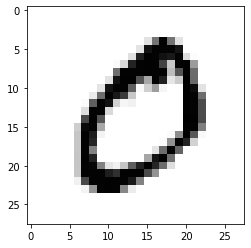

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

# load data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.

n = 1
plt.imshow(x_train[n], cmap='Greys', interpolation='nearest')
plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_train.shape
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)
input_shape

(28, 28, 1)

In [ ]:
y_train[0:10]
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
activation='relu',
input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [ ]:
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [ ]:
batch_size=128
epochs=12

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist=model.fit(x_train, y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=1,
               validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 96s 204ms/step - loss: 0.1888 - accuracy: 0.9428 - val_loss: 7.4982 - val_accuracy: 0.9829
Epoch 2/12
469/469 [==============================] - 92s 197ms/step - loss: 0.0590 - accuracy: 0.9815 - val_loss: 3.8679 - val_accuracy: 0.9902
Epoch 3/12
469/469 [==============================] - 92s 195ms/step - loss: 0.0437 - accuracy: 0.9864 - val_loss: 4.5714 - val_accuracy: 0.9899
Epoch 4/12
469/469 [==============================] - 91s 194ms/step - loss: 0.0350 - accuracy: 0.9889 - val_loss: 5.4931 - val_accuracy: 0.9889
Epoch 5/12
469/469 [==============================] - 91s 193ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 3.6198 - val_accuracy: 0.9928
Epoch 6/12
469/469 [==============================] - 90s 192ms/step - loss: 0.0251 - accuracy: 0.9922 - val_loss: 4.3945 - val_accuracy: 0.9924
Epoch 7/12
469/469 [==============================] - 90s 192ms/step - loss: 0.0234 - accuracy: 0.9923 - val_loss: 4.0538 - val_ac

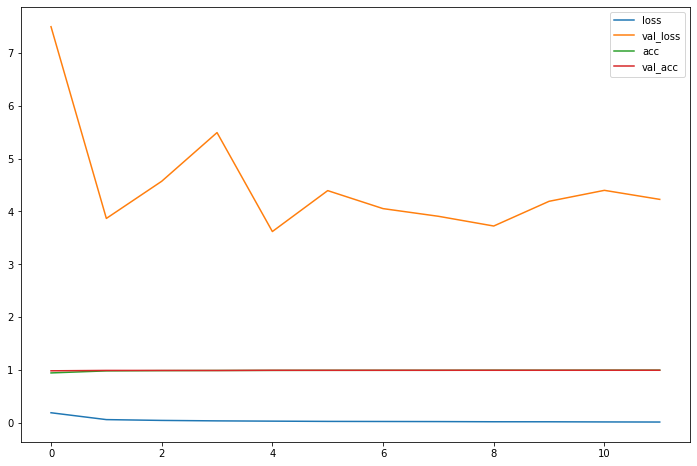

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.show()

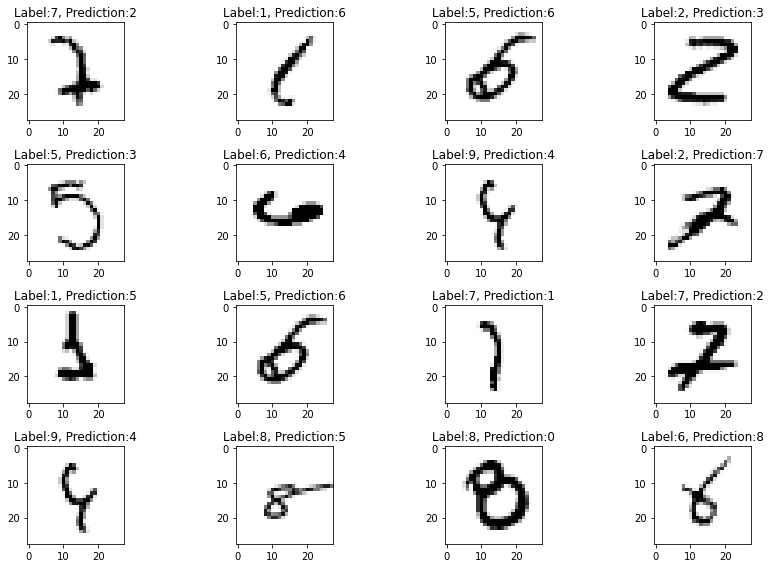

In [ ]:
import random
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
test_labels = np.argmax(y_test, axis=1)
wrong_result = []
for n in range(0, len(test_labels)):
  if predicted_labels[n] != test_labels[n]:
    wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)
count = 0
nrows = ncols = 4
plt.figure(figsize=(12,8))

for n in samples:
  count += 1
  plt.subplot(nrows, ncols, count)
  plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
  tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
  plt.title(tmp)

plt.tight_layout()
plt.show()

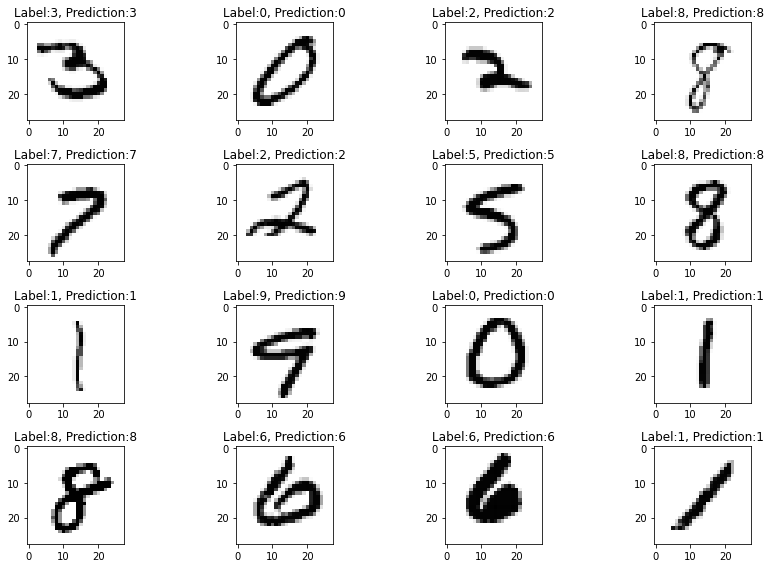

In [ ]:
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
test_labels = np.argmax(y_test, axis=1)
correct_result = []
for n in range(0, len(test_labels)):
  if predicted_labels[n] == test_labels[n]:
    correct_result.append(n)

samples = random.choices(population=correct_result, k=16)
count = 0
nrows = ncols = 4
plt.figure(figsize=(12,8))

for n in samples:
  count += 1
  plt.subplot(nrows, ncols, count)
  plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
  tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
  plt.title(tmp)

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


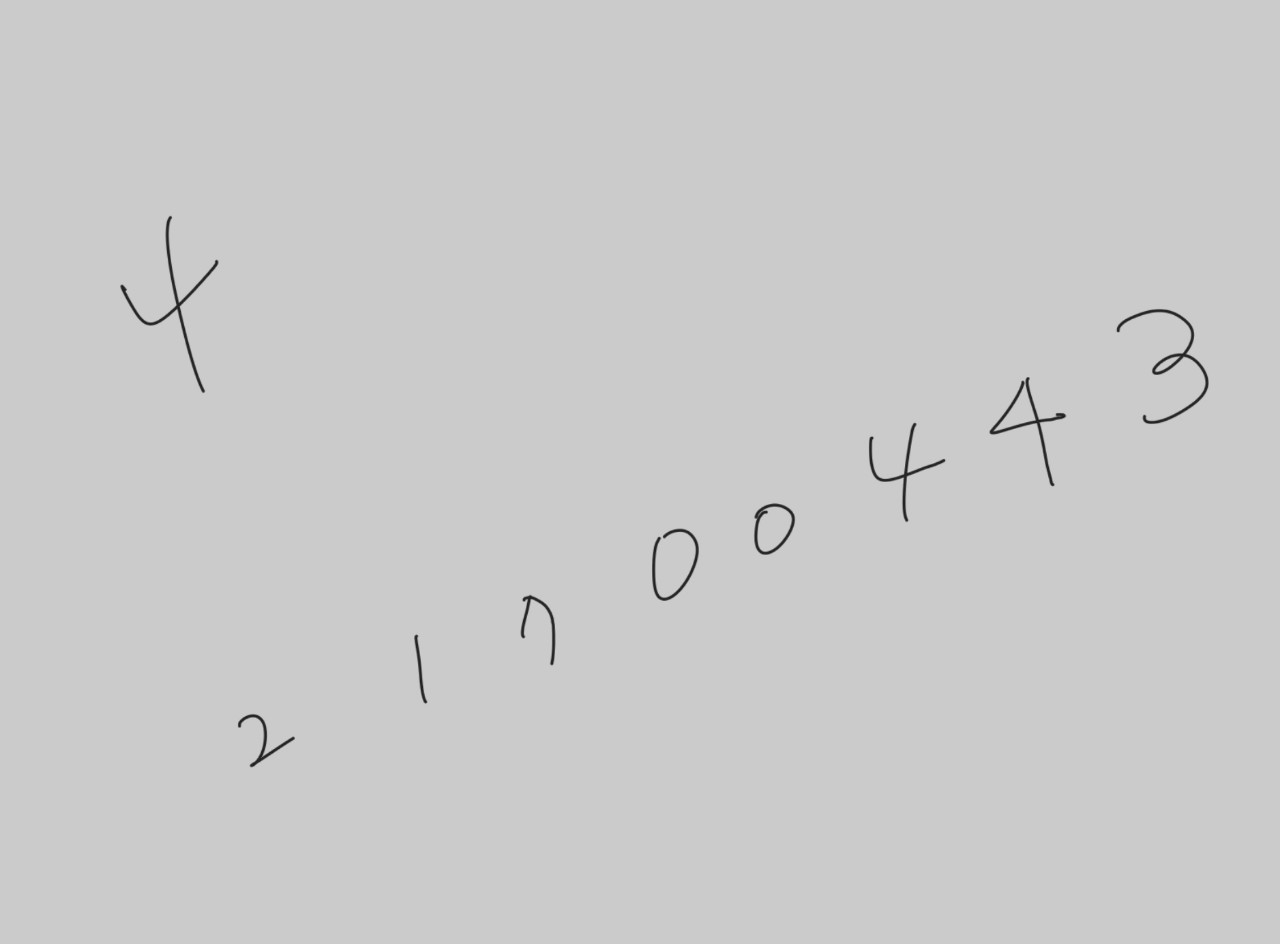

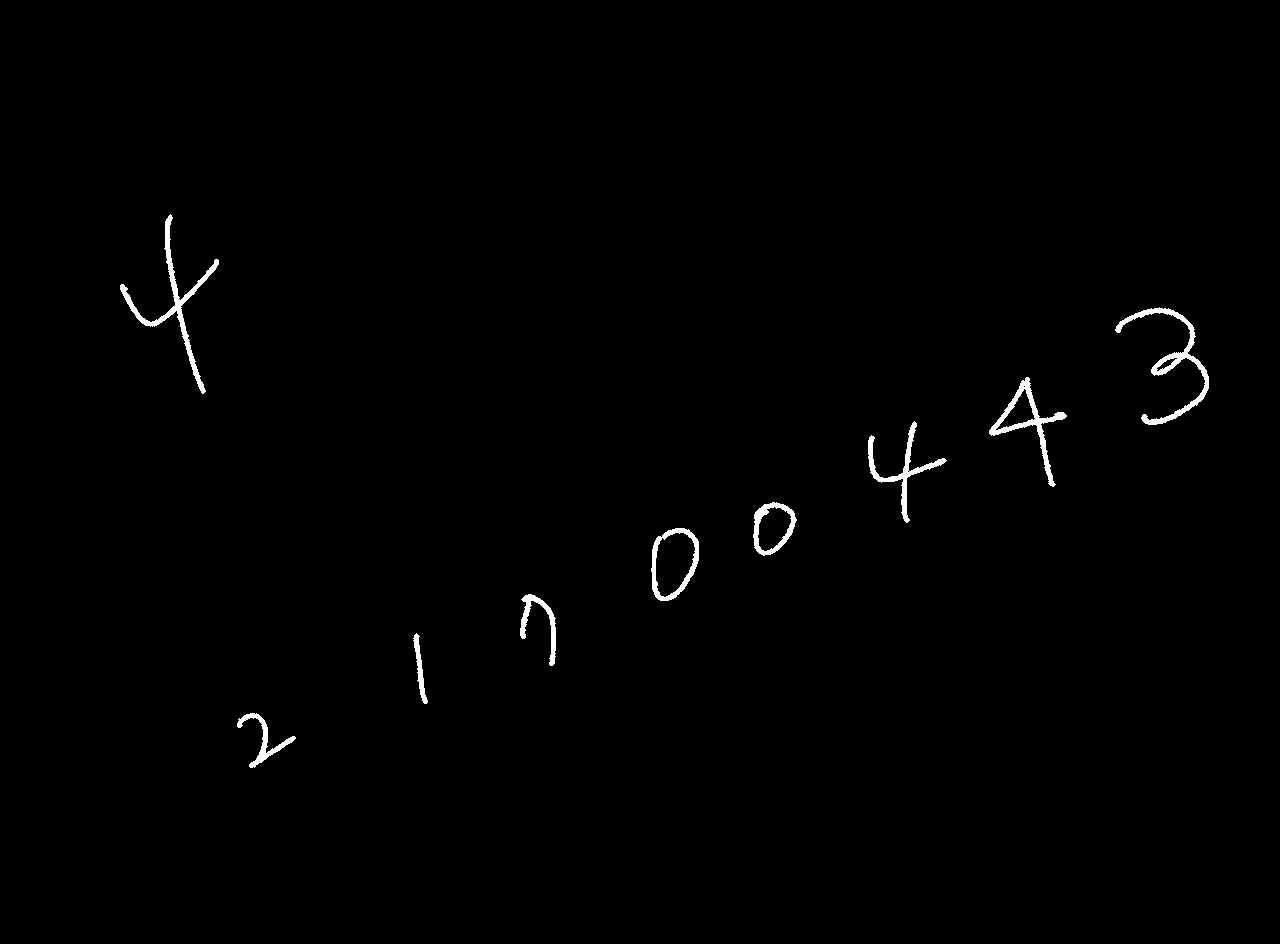

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

my_img = cv.imread('/content/drive/MyDrive/cv_test/student_id.jpg', cv.IMREAD_COLOR)
# cv2_imshow(my_img)
gray_img = cv.cvtColor(my_img, cv.COLOR_BGR2GRAY)

ret, binary_img = cv.threshold(gray_img, 200, 255, cv.THRESH_BINARY_INV)
element = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))
binary_img = cv.morphologyEx(binary_img, cv.MORPH_OPEN, element)

cv2_imshow(gray_img)
cv2_imshow(binary_img)

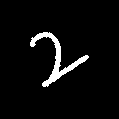

2


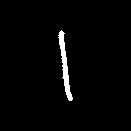

1


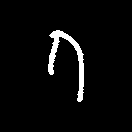

7


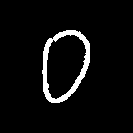

0


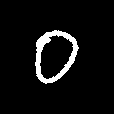

0


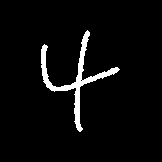

4


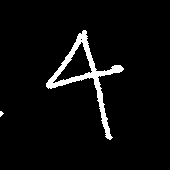

4


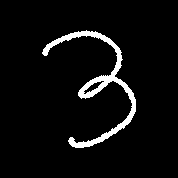

3


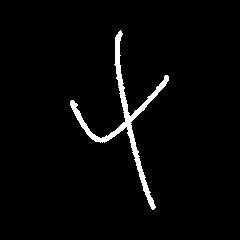

4


In [ ]:
contours, hierarchy = cv.findContours(binary_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
for contour in contours:
  x, y, w, h = cv.boundingRect(contour)

  length=max(w,h) + 60
  digit_img = np.zeros((length, length, 1), np.uint8)

  new_x, new_y = x-(length - w)//2, y-(length - h)//2

  digit_img = binary_img[new_y:new_y+length, new_x:new_x+length]
  cv2_imshow(digit_img)

  element = np.ones((11, 11), np.uint8)
  digit_img = cv.morphologyEx(digit_img, cv.MORPH_DILATE, element)

  digit_img = cv.resize(digit_img, (28, 28), interpolation=cv.INTER_AREA)

  digit_img = digit_img / 255.0

  input_img = digit_img.reshape(1, 28, 28, 1)
  predictions = model.predict(input_img)

  number = np.argmax(predictions)

  cv.rectangle(my_img, (x, y), (x+w, y+h), (0, 255, 0), 2)

  location=(x + int(w*0.5), y-10)
  font=cv.FONT_HERSHEY_COMPLEX
  fontScale=1.2
  cv.putText(my_img, str(number), location, font, fontScale, (0,255,0), 2)

  print(number)

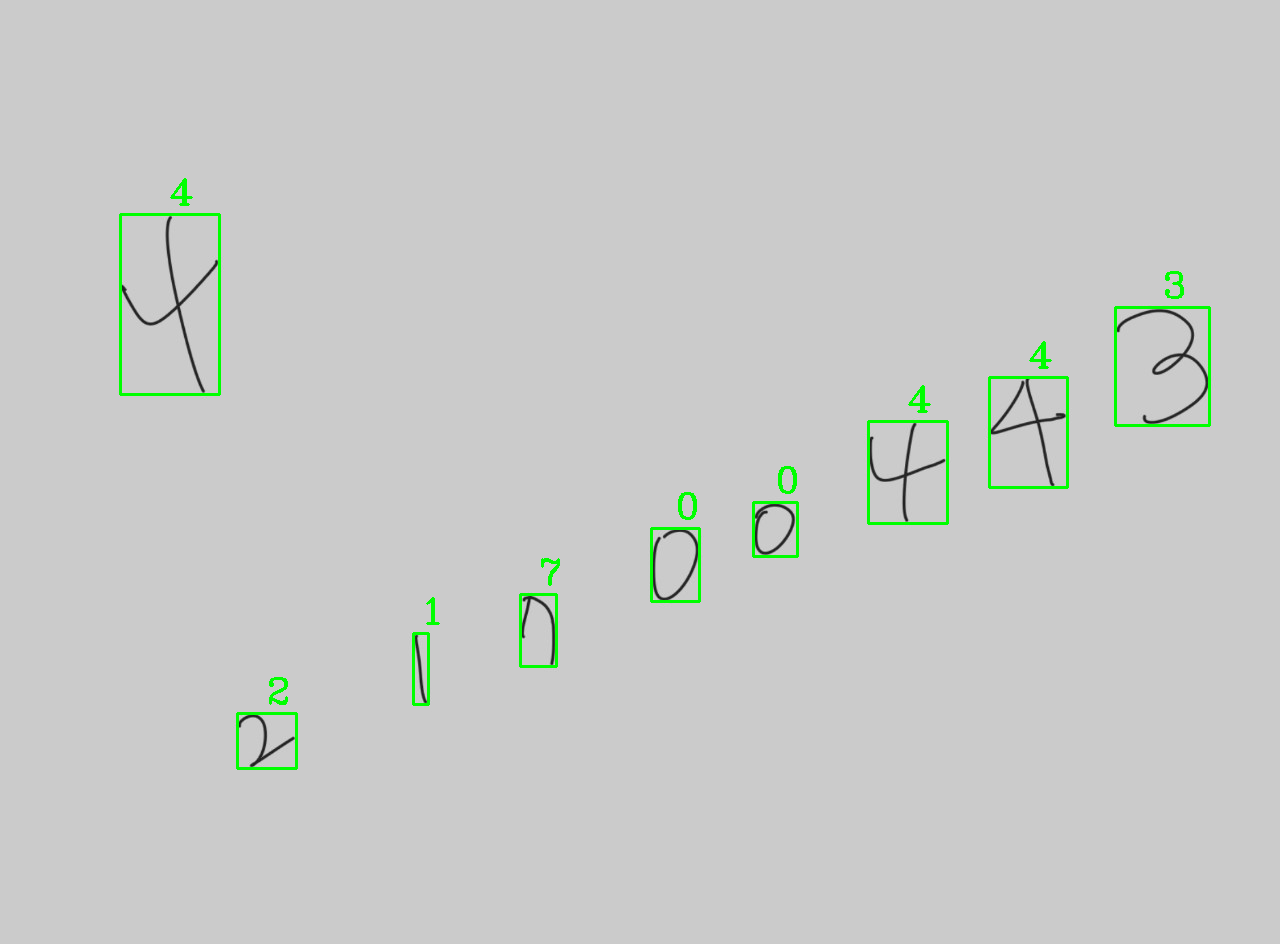

In [ ]:
cv2_imshow(my_img)

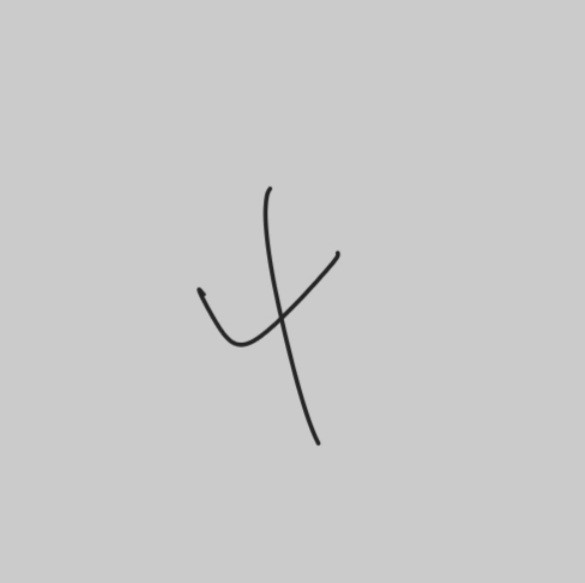

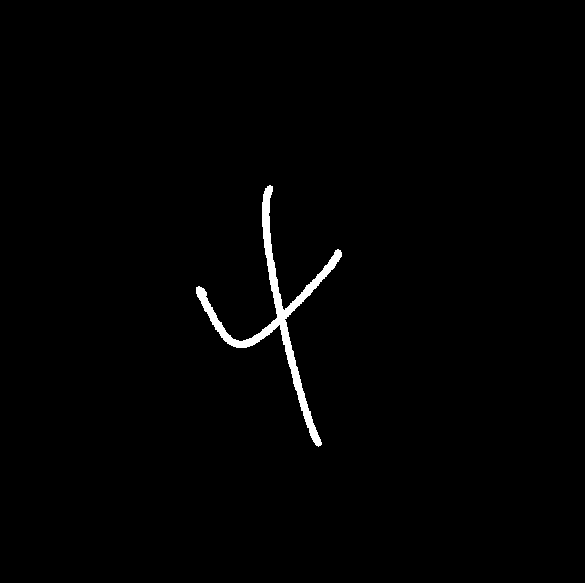

In [76]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

my_img = cv.imread('/content/drive/MyDrive/cv_test/one_digit_test.jpg', cv.IMREAD_COLOR)
# cv2_imshow(my_img)
gray_img = cv.cvtColor(my_img, cv.COLOR_BGR2GRAY)

ret, binary_img = cv.threshold(gray_img, 200, 255, cv.THRESH_BINARY_INV)
element = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
binary_img = cv.morphologyEx(binary_img, cv.MORPH_OPEN, element)

cv2_imshow(gray_img)
cv2_imshow(binary_img)

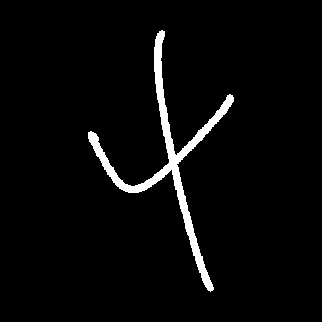

4


In [77]:
contours, hierarchy = cv.findContours(binary_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
for contour in contours:
  x, y, w, h = cv.boundingRect(contour)

  length=max(w,h) + 60
  digit_img = np.zeros((length, length, 1), np.uint8)

  new_x, new_y = x-(length - w)//2, y-(length - h)//2

  digit_img = binary_img[new_y:new_y+length, new_x:new_x+length]
  cv2_imshow(digit_img)

  element = np.ones((11, 11), np.uint8)
  digit_img = cv.morphologyEx(digit_img, cv.MORPH_DILATE, element)

  digit_img = cv.resize(digit_img, (28, 28), interpolation=cv.INTER_AREA)

  digit_img = digit_img / 255.0

  input_img = digit_img.reshape(1, 28, 28, 1)
  predictions = model.predict(input_img)

  number = np.argmax(predictions)

  cv.rectangle(my_img, (x, y), (x+w, y+h), (0, 255, 0), 2)

  location=(x + int(w*0.5), y-10)
  font=cv.FONT_HERSHEY_COMPLEX
  fontScale=1.2
  cv.putText(my_img, str(number), location, font, fontScale, (0,255,0), 2)

  print(number)

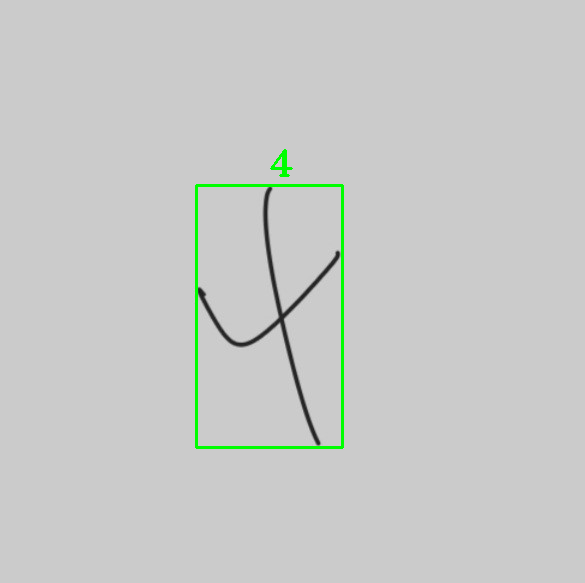

In [78]:
cv2_imshow(my_img)